###### Problem Set 1, due January 10th at 5:30pm 


###Before You Start
Make sure to at least take a basic tutorial in the IPython notebook, otherwise you'll be totally lost.  For this problem set, you should download IMT574-PS1.ipynb and the flights.zip dataset from Canvas. Create a local copy of the notebook and rename it LASTNAME_FIRSTNAME-PS1.ipynb. Then edit your renamed file directly in your browser by typing:
```
ipython notebook <name_of_downloaded_file>
```

You should also make sure the following libraries load correctly (click on the box below and hit Ctrl-Enter)

In [5]:
# #IPython is what you are using now to run the notebook
# import IPython
# print "IPython version:      %6.6s (need at least 1.0)" % IPython.__version__

# Numpy is a library for working with Arrays
import numpy as np
print("Numpy version:        %6.6s (need at least 1.7.1)" % np.__version__)

# SciPy implements many different numerical algorithms
import scipy as sp
print("SciPy version:        %6.6s (need at least 0.12.0)" % sp.__version__)

# Pandas makes working with data tables easier
import pandas as pd
print("Pandas version:       %6.6s (need at least 0.11.0)" % pd.__version__)

# Module for plotting
import matplotlib
print("Mapltolib version:    %6.6s (need at least 1.2.1)" % matplotlib.__version__)

# SciKit Learn implements several Machine Learning algorithms
import sklearn
print("Scikit-Learn version: %6.6s (need at least 0.13.1)" % sklearn.__version__)

Numpy version:        1.15.4 (need at least 1.7.1)
SciPy version:         1.1.0 (need at least 0.12.0)
Pandas version:       0.23.4 (need at least 0.11.0)
Mapltolib version:     3.0.2 (need at least 1.2.1)
Scikit-Learn version: 0.20.1 (need at least 0.13.1)


##About the Problem Set: 
This is the same problem set used by Emma Spiro in INFX573. The only difference is that instead of doing the problem set in R, you will use Python and the IPython notebook.

##Instructions: 
In this problem set you will perform a basic exploratory analysis on an example dataset, bringing to bear all of your new skills in data manipulation and visualization. You will be required to submit well commented python code, documenting all code used in this problem set, along with a write up answering all questions below. Use figures as appropriate to support your answers, and when required by the problem. 
This data set uses the NYCFlights13 dataset. You can download the dataset from canvas.
Selected questions ask you to answer in multiple ways. Make sure to provide different functions or ways for answering the same question. This will help you see that most data questions can be answered in different ways even with the same software language.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
flights_df= pd.read_csv('flights.csv')

In [8]:
print(flights_df.shape)
print(flights_df.columns)
print(flights_df.dtypes)

(336776, 17)
Index(['Unnamed: 0', 'year', 'month', 'day', 'dep_time', 'dep_delay',
       'arr_time', 'arr_delay', 'carrier', 'tailnum', 'flight', 'origin',
       'dest', 'air_time', 'distance', 'hour', 'minute'],
      dtype='object')
Unnamed: 0      int64
year            int64
month           int64
day             int64
dep_time      float64
dep_delay     float64
arr_time      float64
arr_delay     float64
carrier        object
tailnum        object
flight          int64
origin         object
dest           object
air_time      float64
distance        int64
hour          float64
minute        float64
dtype: object


In [9]:
a = flights_df.dest.unique()
print(a)
flights_df.head(10)


['IAH' 'MIA' 'BQN' 'ATL' 'ORD' 'FLL' 'IAD' 'MCO' 'PBI' 'TPA' 'LAX' 'SFO'
 'DFW' 'BOS' 'LAS' 'MSP' 'DTW' 'RSW' 'SJU' 'PHX' 'BWI' 'CLT' 'BUF' 'DEN'
 'SNA' 'MSY' 'SLC' 'XNA' 'MKE' 'SEA' 'ROC' 'SYR' 'SRQ' 'RDU' 'CMH' 'JAX'
 'CHS' 'MEM' 'PIT' 'SAN' 'DCA' 'CLE' 'STL' 'MYR' 'JAC' 'MDW' 'HNL' 'BNA'
 'AUS' 'BTV' 'PHL' 'STT' 'EGE' 'AVL' 'PWM' 'IND' 'SAV' 'CAK' 'HOU' 'LGB'
 'DAY' 'ALB' 'BDL' 'MHT' 'MSN' 'GSO' 'CVG' 'BUR' 'RIC' 'GSP' 'GRR' 'MCI'
 'ORF' 'SAT' 'SDF' 'PDX' 'SJC' 'OMA' 'CRW' 'OAK' 'SMF' 'TUL' 'TYS' 'OKC'
 'PVD' 'DSM' 'PSE' 'BHM' 'CAE' 'HDN' 'BZN' 'MTJ' 'EYW' 'PSP' 'ACK' 'BGR'
 'ABQ' 'ILM' 'MVY' 'SBN' 'LEX' 'CHO' 'TVC' 'ANC' 'LGA']


,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
1,2,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
2,3,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
3,4,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0
4,5,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0
5,6,2013,1,1,554.0,-4.0,740.0,12.0,UA,N39463,1696,EWR,ORD,150.0,719,5.0,54.0
6,7,2013,1,1,555.0,-5.0,913.0,19.0,B6,N516JB,507,EWR,FLL,158.0,1065,5.0,55.0
7,8,2013,1,1,557.0,-3.0,709.0,-14.0,EV,N829AS,5708,LGA,IAD,53.0,229,5.0,57.0
8,9,2013,1,1,557.0,-3.0,838.0,-8.0,B6,N593JB,79,JFK,MCO,140.0,944,5.0,57.0
9,10,2013,1,1,558.0,-2.0,753.0,8.0,AA,N3ALAA,301,LGA,ORD,138.0,733,5.0,58.0


##Some Tips

* This assignment involves extensive Data frame splitting and aggregation. You should look into the details of the methods groupby, transform, sum, count, mean etc
* Many of the tasks in the assignment can be done either through the Pandas Data Frame or by converting the data frames to Series. Many of the methods in the numpy are applicable to Series only. When stuck, try to explore the type of object (Pandas Data Frame or Numpy Series) you are dealing with.

##Question 1
Let’s explore flights from NYC to Seattle. Use the flights dataset to answer the following questions.

(a) How many flights were there from NYC airports to Seattle in 2013?

In [10]:
# Your code here
# Filter the flights with destination as Seattle 
# and save it to the variable flights_to_seattle_df
flights_to_seattle_df = flights_df[flights_df.dest=='SEA']
flights_to_seattle_df.shape[0]

3923

Ans : There are a total of 3923 flights from NYC airport to Seattle.

(b) How many airlines fly from NYC to Seattle?

In [11]:
# Your code here
# List the unique values in the carrier column
carriersN_to_seattle = flights_to_seattle_df.carrier.unique()
print(carriersN_to_seattle)

['AS' 'DL' 'UA' 'B6' 'AA']


Ans : A total of 5 airlines fly from NYC to Seattle.

(c) How many unique air planes fly from NYC to Seattle?

In [12]:
# Your code here
# List the unique values in the tailnum column
flights_to_seattle_df.tailnum.nunique()


935

Ans : A total of 935 unique airplanes fly from NYC to Seattle.

(d) What is the average arrival delay for flights from NC to Seattle?

In [13]:
# Your code here
#Use the mean() to find the mean of the arr_delay column
flights_to_seattle_df['arr_delay'].mean()

-1.0990990990990992

Ans : Average arrival delay is - 1.099

(e) What proportion of flights to Seattle come from each NYC airport? Provide multiple ways of answering the question.

In [14]:
# Approach 1. Group by each NYC airport, take the count and divide it by the count of all the rows
flights_to_seattle_df.groupby(flights_to_seattle_df.origin)['origin'].count()/flights_to_seattle_df.shape[0]

# Approach 2. Make a dictionary with key as the origin airport and 
# the value as the number of rows from that origin
nyc_to_sea = flights_to_seattle_df['origin'].unique()
nyc_to_seaCounts = dict(flights_to_seattle_df['origin'].value_counts())
for origin in nyc_to_seaCounts:
    print(origin + ': ' + str(nyc_to_seaCounts[origin]/len(flights_to_seattle_df)))


JFK: 0.5332653581442773
EWR: 0.46673464185572267


Ans : The ratio of number of flights from EWR to SEA is 0.46 and the ratio of number of flights from JFK to SEA flights is 0.53

## Question 2
Flights are often delayed. Consider the following questions exploring delay patterns.

(a) Which date has the largest average departure delay? Which date has the largest average arrival delay?

In [15]:
# Your code here
# Create a new column complete_data by merging the columns year,month and date.
# Format the merges column to date_time
# Group the new dataset with dep_delay and arr_delay columns and find its mean. 
flights_df.loc[:,'complete_date'] = pd.to_datetime(flights_df.year.astype(str)
+ '-' + flights_df.month.astype(str) + '-' + flights_df.day.astype(str))
print(flights_df.groupby(flights_df.complete_date)['dep_delay'].mean().idxmax())
print(flights_df.groupby(flights_df.complete_date)['arr_delay'].mean().idxmax())


2013-03-08 00:00:00
2013-03-08 00:00:00


 Ans : 8th March 2013 has both the largest average departure and arrival delay. 

(b) What was the worst day to fly out of NYC in 2013 if you dislike delayed flights?


In [16]:
# Your code here
# Group the data by day name (Mon , tues) and then find the mean of each category.
# Sort the mean in decending order and take the top row.
worst_day_stats = flights_df.groupby(flights_df.complete_date.dt.day_name()).mean().dep_delay.sort_values(ascending=False).head(1)
print(worst_day_stats)

complete_date
Thursday    16.14892
Name: dep_delay, dtype: float64


 Ans : The worst day to fly out of NYC in 2013 was Thursday because it had an average delay time of 16.14

(c) Are there any seasonal patterns in departure delays for flights from NYC?

In [17]:
# Your code here
# Group the data by Month name (Jan , Feb) and then find the mean of departure delay within each category. Sort the mean in descending order and print the summary statistics.

delay_month_stats = flights_df.groupby(flights_df.complete_date.dt.month_name()).mean().dep_delay.sort_values(ascending=False)
print(delay_month_stats)

complete_date
July         21.727787
June         20.846332
December     16.576688
April        13.938038
March        13.227076
May          12.986859
August       12.611040
February     10.816843
January      10.036665
September     6.722476
October       6.243988
November      5.435362
Name: dep_delay, dtype: float64


Ans : From the average delay statistics, we see that there is a peak in departure delays during the summers (June and July) and the delays generally fall down during the winter months (November, October and January).

(d) On average, how do departure delays vary over the course of a day?

In [18]:
# Your code here
# Group the data by Hour (01 , 02..., 24) and then find the mean of departure delay within each category. Sort the mean in descending order print the summary statistics.

delay_hour_stats = flights_df.groupby(flights_df['hour']).mean().dep_delay.sort_values(ascending=False)
print(delay_hour_stats)

hour
3.0     304.727273
2.0     239.921875
1.0     207.049327
0.0     128.642452
23.0     96.946865
22.0     68.190042
24.0     64.862069
21.0     42.064964
20.0     28.266213
19.0     21.497342
18.0     18.664671
17.0     16.756593
16.0     13.621150
15.0     10.682049
13.0      9.380639
14.0      8.090381
12.0      7.601892
11.0      5.652309
10.0      5.548644
9.0       4.268295
8.0       1.091432
7.0       0.223289
6.0      -1.520552
5.0      -4.355644
4.0      -5.554098
Name: dep_delay, dtype: float64


Ans : The average departure delay time of the flights is the lowest at 4 am in the morning and as the day progresses, the average departure delay time increases. Late night and early morning flights have the highest delay time (12 am to 3 am).

## Question 3
    Which flight departing NYC in 2013 flew the fastest?

In [19]:
# Your code here
# Create a new column 'speed' by dividing the distance and the air_time. Sort the data frame on the speed column and take the top 1 row.
flights_df.loc[:,'speed'] = flights_df.distance / (flights_df.air_time)
print(flights_df.sort_values('speed', ascending=False).head(1)['flight'])

216447    1499
Name: flight, dtype: int64


Ans : Flight 1499 flew the fastest in 2013.

## Question 4
Which flights (i.e. carrier + flight + dest) happen every day? Where do they fly to?

In [20]:
# Your code here
# Group the data frame by carrier, flight and dest columns and find the count of all the distinct dates in them.
count_by_group = flights_df.groupby(['carrier', 'flight', 'dest'])['complete_date'].unique().reset_index(name = 'counts')

# Count of days when each flight took off.
count_by_group['day_count'] = count_by_group['counts'].str.len()

#Getting all the flights that take off everyday.
filtered_flights = count_by_group.loc[count_by_group['day_count'] == (max(flights_df['complete_date']) - min(flights_df['complete_date'])).days + 1, ['carrier', 'flight', 'dest']]
print(filtered_flights)

      carrier  flight dest
767        AA      59  SFO
775        AA     119  LAX
783        AA     181  LAX
904        AA    1357  SJU
914        AA    1611  MIA
1118       B6     219  CLT
1147       B6     359  BUR
1150       B6     371  FLL
1169       B6     431  SRQ
1243       B6     703  SJU
1379       B6    1783  MCO
2012       DL    2159  MCO
2081       DL    2391  TPA
4631       EV    5712  IAD
5116       UA      15  HNL
10607      VX     251  LAS
10609      VX     407  LAX
10613      VX     413  LAX


Ans : From the results we see that a total of 18 flights flew everday. They were 1611, 703, 1357, 413, 219, 15, 359, 371, 431, 181, 2159, 119, 407, 5712, 251, 59, 1783 and 2391.
The destination for these flights were MIA, SJU, SJU, LAX, CLT, HNL, BUR, FLL, SRQ, LAX, MCO, LAX, LAX, IAD, LAS, SFO, MCO and TPA respectively.

## Question 5
Develop one research question you can address using the nycflights2013 dataset. Provide two visualizations to support your exploration of this question. Discuss what you find.


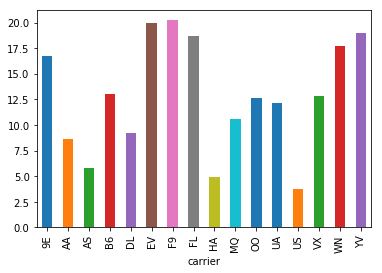

In [21]:
# Your code here
# Plotting the average departure delay time vs carrier 
mean_dep_delay_carrier = flights_df.groupby(['carrier'])['dep_delay'].mean()
mean_dep_delay_carrier.plot.bar(x=flights_df['carrier'],y=flights_df['dep_delay'])

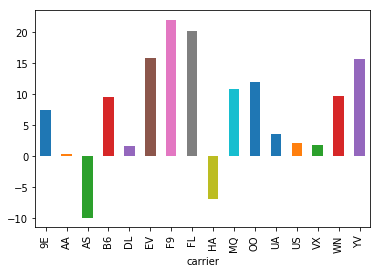

In [22]:
# Plotting the average arrival delay time vs carrier 
mean_arrival_delay_carrier = flights_df.groupby(['carrier'])['arr_delay'].mean()
mean_arrival_delay_carrier.plot.bar(x=flights_df['carrier'],y=flights_df['arr_delay'])

Ans : Earlier, we saw that the average departure delay varies with the month of the year. There might be other factors as well that contribute to the delay in either departure or arrival. One possible research question can be "Is there any relationship between the flight carrier and the average delay time?". 

We plot two graphs to perform exploratory data analysis.
1) The average departure delay time vs carrier 
2) The average arrival delay vs carrier.

From both the plots, we see that the delay time varies with the type of carrier and therefore we can say that there is some relationship between these variables. Also, the carrier F9 has the highest average departure delay as well as the highest average arrival delay which makes it the worst airline service provider for 2013.

## Question 6
What weather conditions are associated with flight delays leaving NYC? Use graphics to explore.

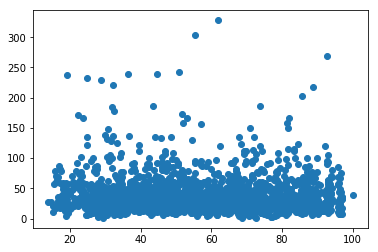

In [23]:
# Your code here
# First , we filter out and collect only the data points that have an departure delay of more than 0 and then group them
# by origin, month, day and hour.
# We merge the filtered and aggregrated dataset with the weather dataset and then use it to see the relationships
# between departure delay time and various other weather conditions.
weather_df = pd.read_csv('weather.csv')

flights_dep_Delay_morethan0 = flights_df[(flights_df.dep_delay > 0)]
flights_dep_Delay_morethan0_group = flights_dep_Delay_morethan0.groupby(['origin', 'month', 'day', 'hour'])
set1 = flights_dep_Delay_morethan0_group['dep_delay'].agg([np.size, np.mean]).reset_index()

merged_df = pd.merge(set1, weather_df, on = ['origin', 'month', 'day', 'hour'])
merged_df = merged_df.rename(columns={'size': 'count', 'mean': 'delay'})

# dropping the NA values. Plot between humidity and departure delay time
merged_df['humid'].dropna()
merged_df_grouped_humid = merged_df.groupby([merged_df.humid])['delay', 'count'].agg([np.mean]).reset_index()
plt.scatter(merged_df_grouped_humid.humid, merged_df_grouped_humid.delay)


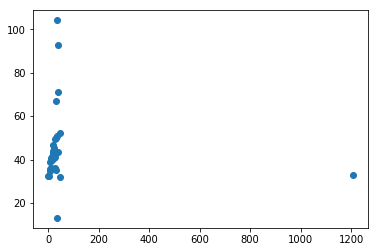

In [25]:
# dropping the NA values. Plot between wind_gust and departure delay time
merged_df['wind_gust'].dropna()
merged_df_grouped_wind_gust = merged_df.groupby([merged_df.wind_gust])['delay', 'count'].agg([np.mean]).reset_index()
plt.scatter(merged_df_grouped_wind_gust.wind_gust, merged_df_grouped_wind_gust.delay)

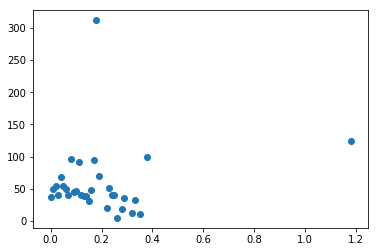

In [26]:
# dropping the NA values. Plot between precipitation and departure delay time
merged_df['precip'].dropna()
merged_df_grouped_precip = merged_df.groupby([merged_df.precip])['delay', 'count'].agg([np.mean]).reset_index()
plt.scatter(merged_df_grouped_precip.precip, merged_df_grouped_precip.delay)

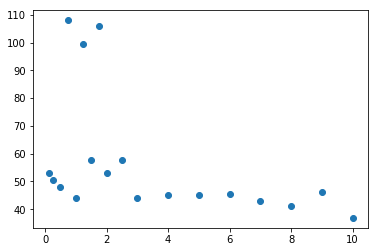

In [18]:
# dropping the NA values. Plot between visibility and departure delay time
merged_df['visib'].dropna()
merged_visible_df = merged_df.groupby([merged_df.visib])['delay', 'count'].agg([np.mean]).reset_index()
plt.scatter(merged_visible_df.visib, merged_visible_df.delay)

Ans : Since we have plotted various graphs, we will analyze it individually below:

1) The first plot is the variation of departure delay time with humidity. 
There is no obvious relationship evident from the plot.
2) The second plot is the variation of departure delay time with wind_gust. 
There is no obvious relationship evident from the plot but we have one distinct outlier. 
3) The third plot is the variation of departure delay time with precipitation. 
Strangely, we see that departure delay somewhat reduces with an increase in precipitation.
4) The fourth plot is the variation of departure delay time with visibility. 
We see that low visibilty leads to higher departure delay time. 